## K-means Algorithm

https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

### Algo

- randomly init k centroids from k random, distinct points in dataset
- for n iters
    - assign points to closest centroid
    - update centroid i to be the mean of the points assigned

### Questions

1. is there such a thing as mini-batch k-means? 

In [48]:
import numpy as np
from collections import defaultdict 
import matplotlib.pyplot as plt

In [134]:
def gen_cluster(n, x_offset, y_offset):
    x = np.random.rand(n).reshape(-1, 1) + x_offset
    y = np.random.rand(n).reshape(-1, 1) + y_offset
    return np.concatenate([x, y], axis=1)

In [173]:
idxs = np.random.choice(10, 2, replace=False)

In [174]:
idxs

array([8, 2])

In [194]:
class Kmeans(object):

    def __init__(self, k, n_feats, n_iters):
        self.k = k
        self.n_iters = n_iters
        # centroids are rows
        self.centroids = np.zeros((k, n_feats))

    def fit(self, x):
        """
        Runs for n_iters and updates centroids
        """
        # init centroids to random data points
        idxs = np.random.choice(x.shape[0], size=self.k, replace=False)
        self.centroids = x[idxs]
        
        for _ in range(self.n_iters):
            # assign points to centroids
            dists = np.zeros((x.shape[0], self.k))
            for j in range(self.k):
                c = self.centroids[j]
                dists[:, j] = np.linalg.norm(x - c, axis=1)
            clusters = np.argmin(dists, axis=1)

            for j in range(self.k):
                if np.sum(x[clusters == j]):
                    self.centroids[j] = np.mean(x[clusters == j], axis=0)
            
        # predict the cluster labels for each datapoint
        out = np.array([self.get_closest_centroid(xx) for xx in x])
        return out
        
    def get_closest_centroid(self, x_i):    
        min_d = float("inf") 
        min_c = -1
        
        for j in range(self.k):
            c_j = self.centroids[j]
            d = np.sqrt(np.sum((c_j - x_i)**2))
            if d < min_d:
                min_d = d
                min_c = j

        return min_c

In [195]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [189]:
C1 = gen_cluster(10, 0, 5)

In [190]:
C2 = gen_cluster(10, -10, -10)

In [179]:
C3 = gen_cluster(10, 0, 0)

In [180]:
X = np.concatenate([C1, C2, C3], axis=0)

In [181]:
np.argmin(X, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0])

In [182]:
km.centroids[0]

array([0.41746157, 5.29856474])

In [183]:
np.linalg.norm(X, axis=1).shape

(30,)

In [184]:
np.linalg.norm(X - km.centroids[0], axis=1)

array([ 0.30292487,  0.28549364,  0.74910692,  0.48605956,  0.24755168,
        0.27315216,  0.27053229,  0.31957638,  0.48616359,  0.26303677,
       17.99835826, 18.21878236, 18.19564113, 17.88763395, 17.68845058,
       18.03323016, 17.40627443, 17.89152861, 18.24833328, 18.34437202,
        4.89800159,  4.94490145,  4.89439061,  4.68351214,  5.27292769,
        4.35705451,  4.70948443,  4.94130136,  4.8926341 ,  4.86750685])

In [197]:
km = Kmeans(k=4, n_feats=2, n_iters=20)

In [198]:
X.shape

(30, 2)

In [199]:
clusters = km.fit(X)

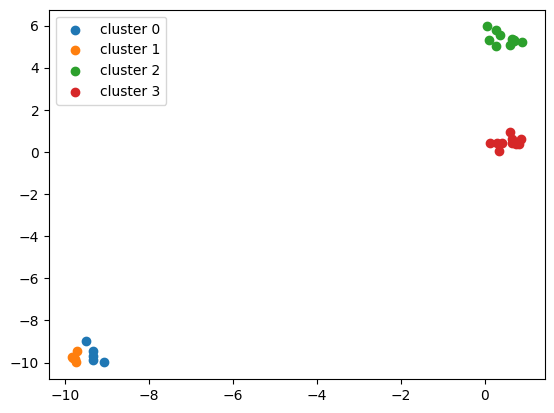

In [200]:
for k in range(km.k):
    bool_idxs = clusters == k
    x_cluster = X[bool_idxs][:, 0]
    y_cluster = X[bool_idxs][:, 1]
    plt.scatter(x_cluster, y_cluster, label=f"cluster {k}")
plt.legend()
plt.show()

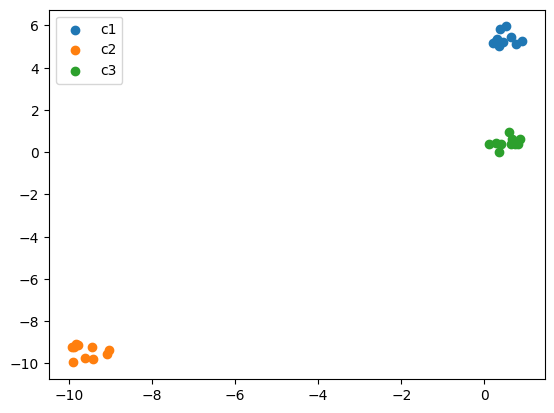

In [201]:
plt.scatter(C1[:, 0], C1[:, 1], label="c1")
plt.scatter(C2[:, 0], C2[:, 1], label="c2")
plt.scatter(C3[:, 0], C3[:, 1], label="c3")
plt.legend()